In [370]:
#Import packages
import numpy as np
import pandas as pd
import bamboolib as bam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.image as pltimg
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [1]:
#Import dataset
housing = pd.read_csv(r"C:\Local\ALY6020_Predictive Analytics\Week 5\letters.csv")
housing

NameError: name 'pd' is not defined

In [372]:
housing.shape

(22651, 26)

In [373]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [374]:
housing.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [375]:
# we drop 'Suite/ Condo   #' coulmn since the entire column is empty
housing.drop(columns=['Parcel ID','City','Unnamed: 0','Suite/ Condo   #'],axis=1,inplace=True) 

In [376]:
#dropping the null value records
housing.dropna(inplace=True)
housing

            Land Use       Property Address Property City   Sale Date  \
0      SINGLE FAMILY       1802  STEWART PL     NASHVILLE   1/11/2013   
1      SINGLE FAMILY      2761  ROSEDALE PL     NASHVILLE   1/18/2013   
2      SINGLE FAMILY      224  PEACHTREE ST     NASHVILLE   1/18/2013   
3      SINGLE FAMILY          316  LUTIE ST     NASHVILLE   1/23/2013   
4      SINGLE FAMILY       2626  FOSTER AVE     NASHVILLE    1/4/2013   
...              ...                    ...           ...         ...   
22646  SINGLE FAMILY     4617 ROCKLAND  TRL       ANTIOCH  10/13/2016   
22647  SINGLE FAMILY      5004 SUNSHINE  DR       ANTIOCH  10/26/2016   
22648  SINGLE FAMILY  4964 HICKORY WOODS  E       ANTIOCH  10/28/2016   
22649  SINGLE FAMILY        1625 5TH  AVE N     NASHVILLE  10/28/2016   
22650  SINGLE FAMILY        1614 5TH  AVE N     NASHVILLE  10/26/2016   

        Legal Reference Sold As Vacant Multiple Parcels Involved in Sale  \
0      20130118-0006337             No         

In [377]:
#Duplicate value check
housing.isna().sum()

Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
dtype: int64

In [378]:
#check duplicated
housing.duplicated().sum()

41

In [381]:
housing_desc = housing.describe().T
import pandas as pd; import numpy as np
housing_desc = housing_desc.reset_index()
housing_desc

                  count           mean            std      min      25%  \
Acreage         22536.0       0.455580       0.613062     0.04      0.2   
Neighborhood    22536.0    4435.710153    2142.333791   107.00   3130.0   
Land Value      22536.0   70210.118743  103040.612049   900.00  22000.0   
Building Value  22536.0  172059.450435  189814.365009  1400.00  85475.0   
Finished Area   22536.0    1914.249596    1077.880089   450.00   1248.0   
Year Built      22536.0    1961.907171      25.770276  1832.00   1947.0   
Bedrooms        22536.0       3.104455       0.830528     0.00      3.0   
Full Bath       22536.0       1.884540       0.951348     0.00      1.0   
Half Bath       22536.0       0.270190       0.480173     0.00      0.0   

                      50%        75%           max  
Acreage              0.28       0.46  1.750000e+01  
Neighborhood      4026.00    6229.00  9.530000e+03  
Land Value       30000.00   60300.00  1.869000e+06  
Building Value  118550.00  187800.00 

In [326]:
num_cols = housing.select_dtypes(include=['int64', 'float64'])

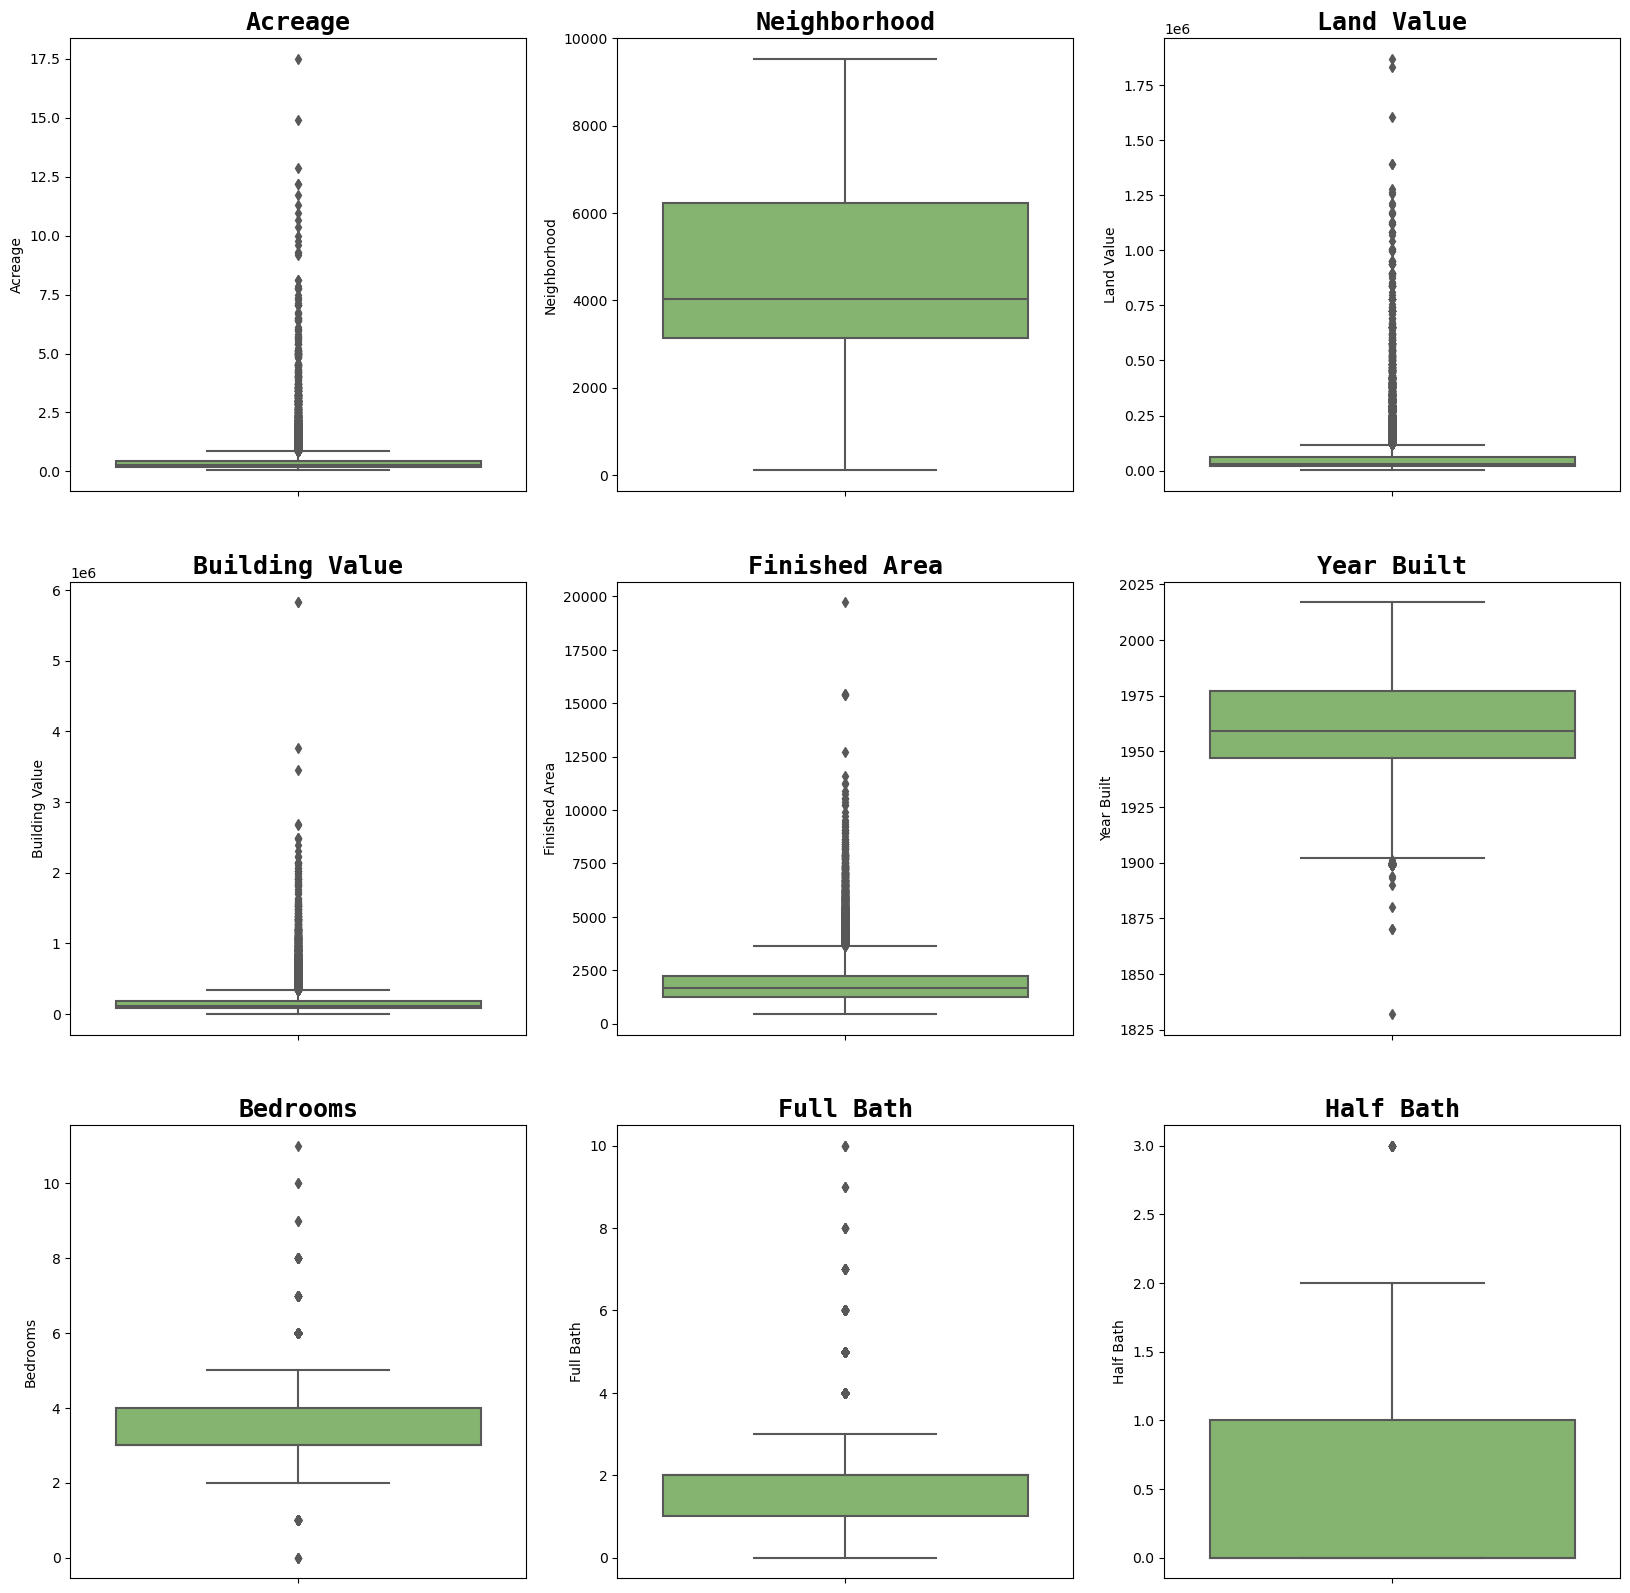

In [327]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))
for i, col in enumerate(num_cols.columns):
    g = sns.boxplot(data = num_cols, y = col, ax = ax[i // 3, i % 3], palette = "summer")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

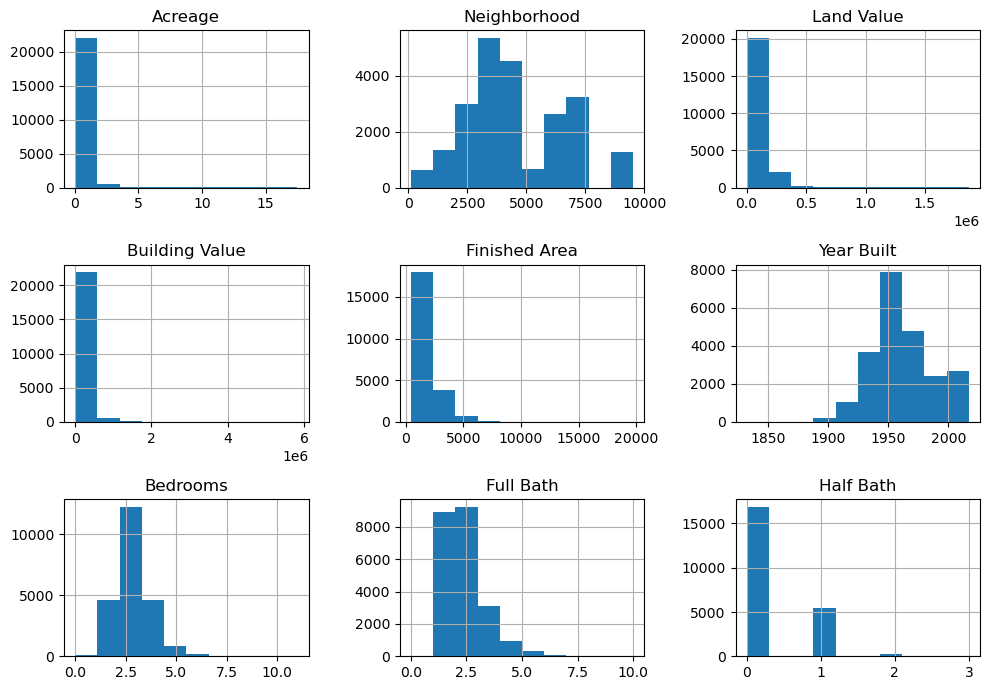

In [328]:
#plot histogram
fig, axs = plt.subplots(3, 3, figsize=(10, 7))
num_cols.hist(ax=axs)
plt.tight_layout()
plt.show()

In [329]:
#EDA
housing_df = housing.copy()

In [330]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22643 entries, 0 to 22650
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22643 non-null  object 
 1   Property Address                   22643 non-null  object 
 2   Property City                      22643 non-null  object 
 3   Sale Date                          22643 non-null  object 
 4   Legal Reference                    22643 non-null  object 
 5   Sold As Vacant                     22643 non-null  object 
 6   Multiple Parcels Involved in Sale  22643 non-null  object 
 7   State                              22643 non-null  object 
 8   Acreage                            22643 non-null  float64
 9   Tax District                       22643 non-null  object 
 10  Neighborhood                       22643 non-null  int64  
 11  Land Value                         22643 non-null  int

In [331]:
housing_df['Sale Month'] = pd.to_datetime(housing_df['Sale Date']).dt.month

In [332]:
housing_df.drop(columns=['Sale Date','Property Address','Legal Reference'],axis=1,inplace = True)

In [333]:
housing_df = pd.get_dummies(housing_df, columns=['Land Use','Property City','Sold As Vacant', 'Multiple Parcels Involved in Sale', 'State', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade','Sale Price Compared To Value'], drop_first=True, dummy_na=False)
housing_df

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Year Built  Bedrooms  Full Bath  Half Bath  Sale Month  ...  \
0            1941       2.0  

Text(0.5, 1.0, 'Heatmap of correlation')

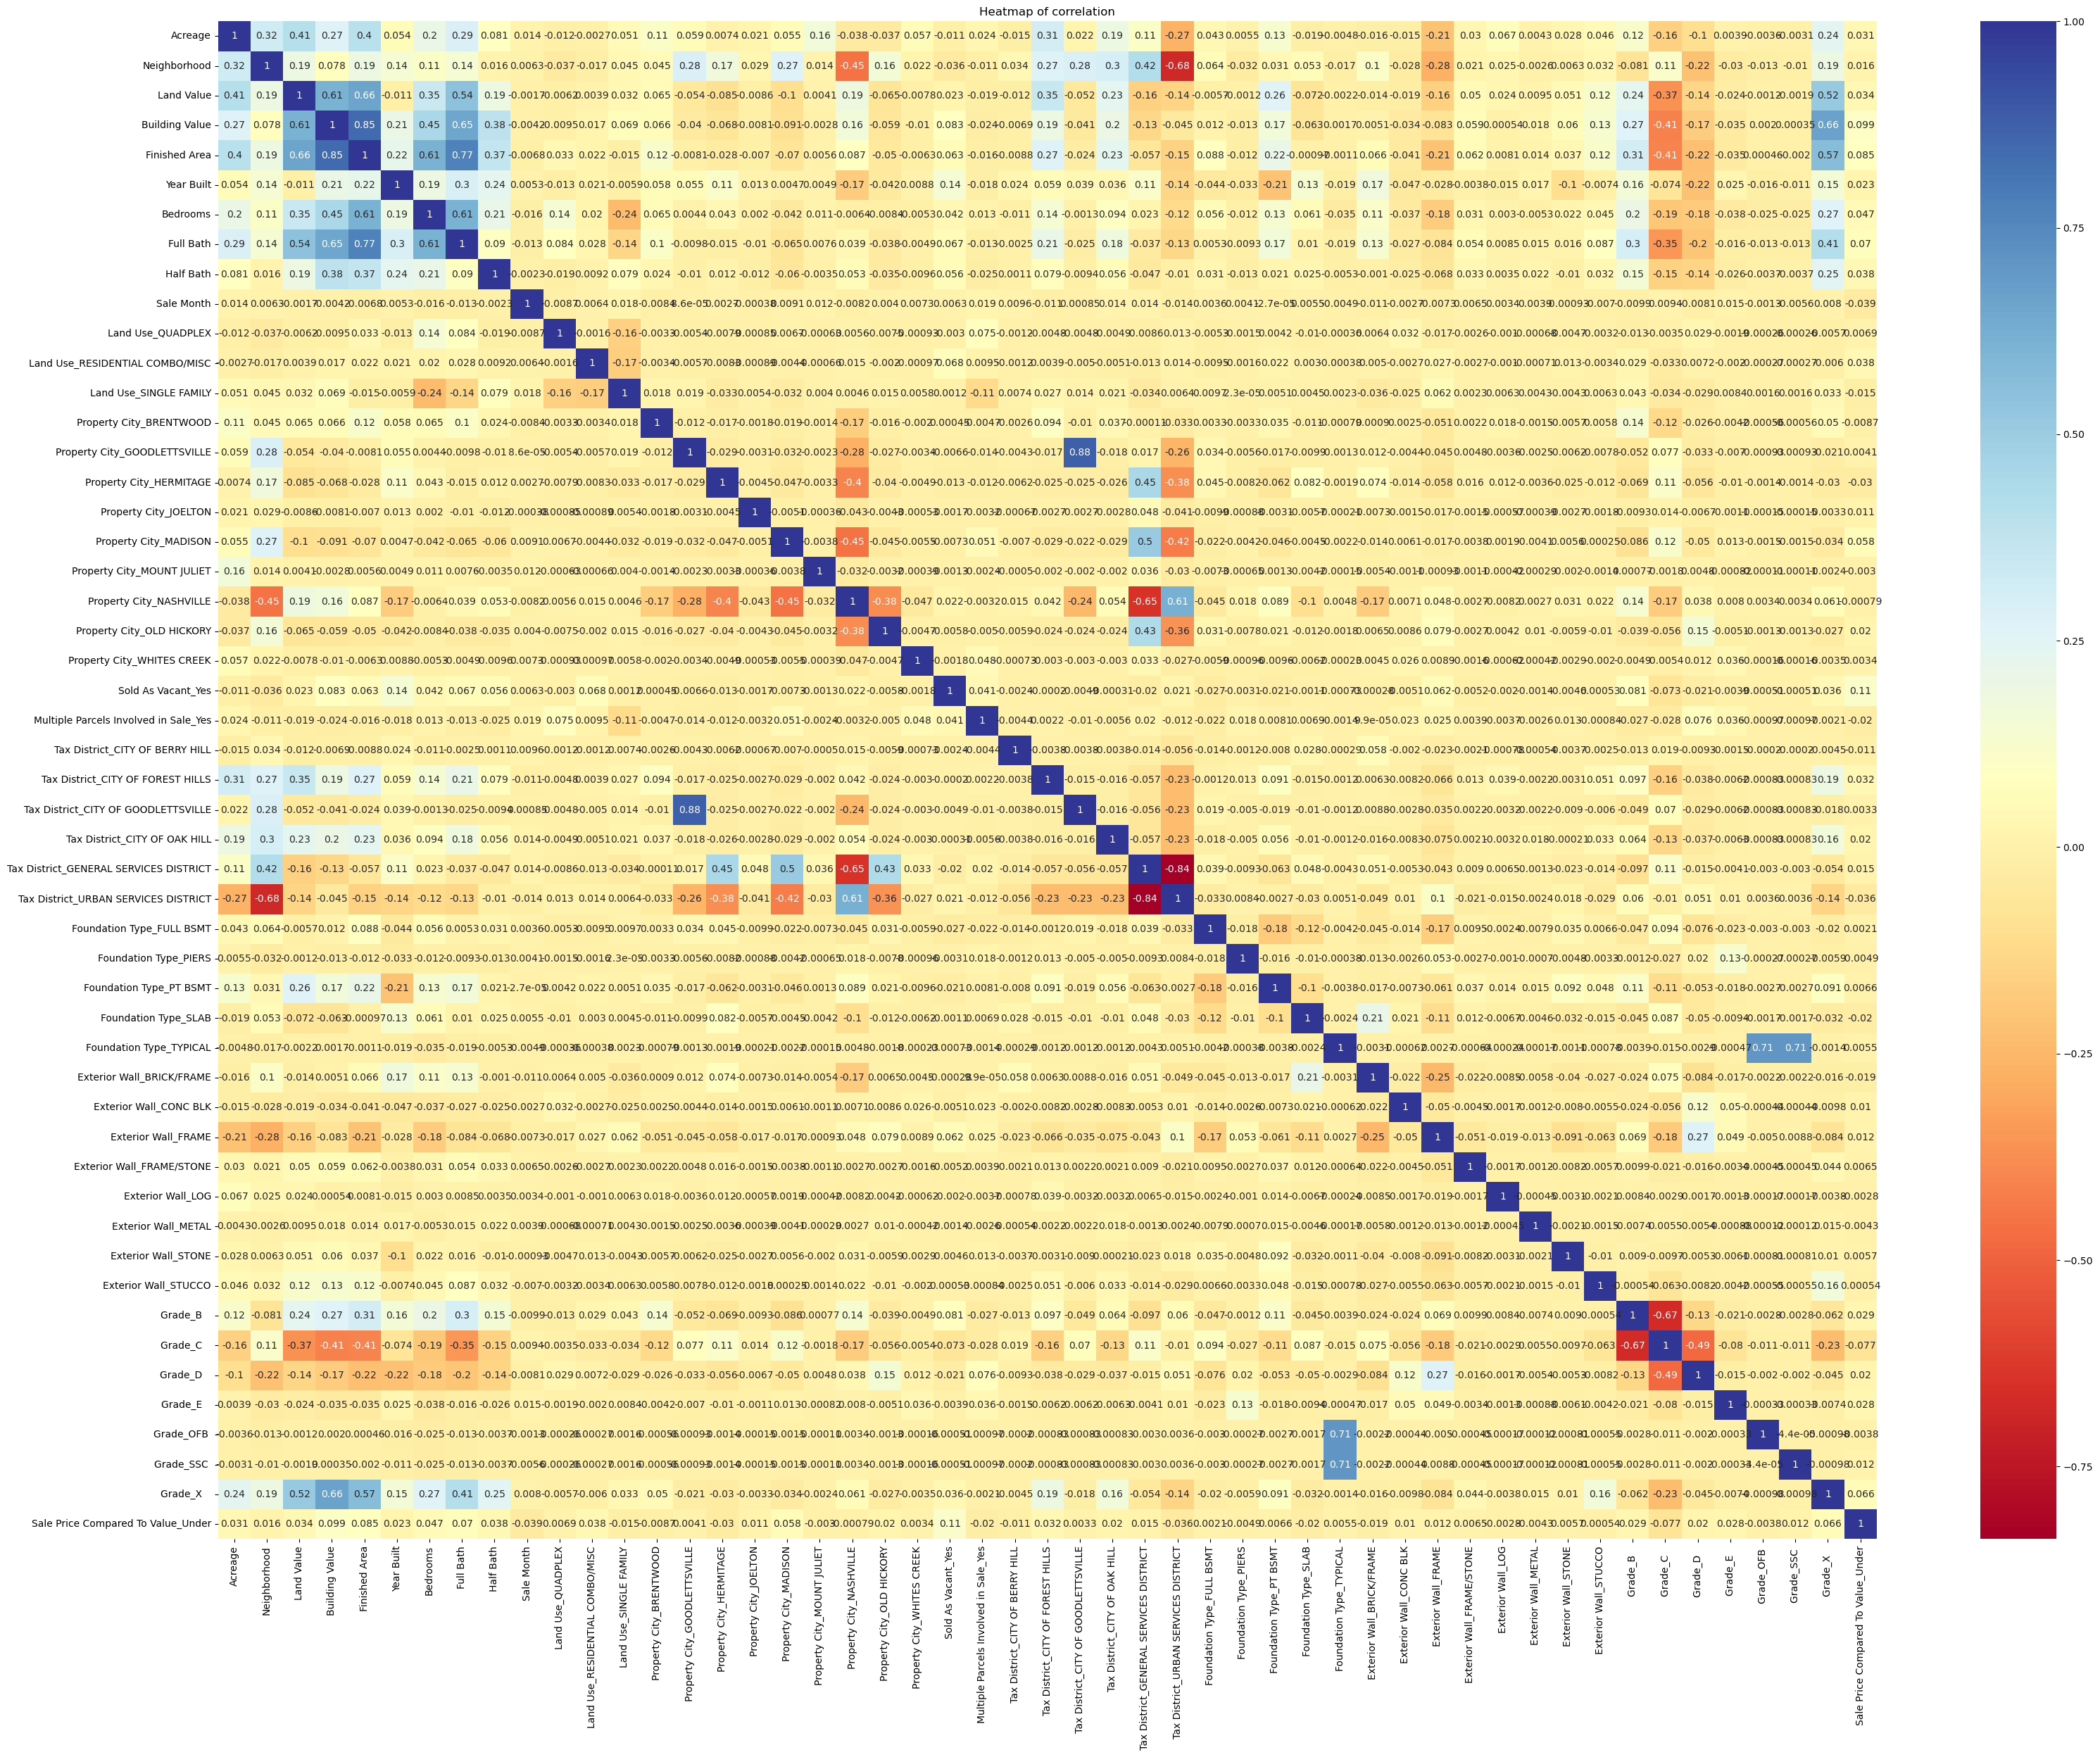

In [334]:
plt.figure(figsize=(38,28))
sns.heatmap(housing_df.corr(), cmap="RdYlBu",annot=True);
plt.title('Heatmap of correlation')

In [383]:
housing_corr = housing_df.corr()
import pandas as pd; import numpy as np
housing_corr = housing_corr.reset_index()
housing_corr

                                        Acreage  Neighborhood  Land Value  \
Acreage                                1.000000      0.320735    0.409923   
Neighborhood                           0.320735      1.000000    0.190827   
Land Value                             0.409923      0.190827    1.000000   
Building Value                         0.271680      0.077803    0.610960   
Finished Area                          0.401844      0.189289    0.658451   
Year Built                             0.053950      0.141249   -0.011363   
Bedrooms                               0.203228      0.107974    0.345458   
Full Bath                              0.288018      0.142105    0.542559   
Half Bath                              0.081387      0.015584    0.192082   
Sale Month                             0.014498      0.006280   -0.001709   
Land Use_QUADPLEX                     -0.012100     -0.036787   -0.006210   
Land Use_RESIDENTIAL COMBO/MISC       -0.002673     -0.016942    0.003881   

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add a constant term to your data
X = sm.add_constant(housing_df)

# calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor                                features
0   9860.826290                                   const
1      1.562070                                 Acreage
2      2.706941                            Neighborhood
3      3.754457                              Land Value
4      5.381109                          Building Value
5      7.867240                           Finished Area
6      1.575253                              Year Built
7      1.971217                                Bedrooms
8      3.691981                               Full Bath
9      1.469201                               Half Bath
10     1.004903                              Sale Month
11     1.055513                       Land Use_QUADPLEX
12     1.042186         Land Use_RESIDENTIAL COMBO/MISC
13     1.232308                  Land Use_SINGLE FAMILY
14     1.215926                 Property City_BRENTWOOD
15     5.283178            Property City_GOODLETTSVILLE
16     2.908732                 Property City_HE

In [338]:
housing_df.drop(columns=['Tax District_GENERAL SERVICES DISTRICT', 'Tax District_URBAN SERVICES DISTRICT', 'Foundation Type_TYPICAL', 'Grade_C   ', 'Grade_OFB ', 'Grade_SSC '],axis=1,inplace=True)
housing_df

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Year Built  Bedrooms  Full Bath  Half Bath  Sale Month  ...  \
0            1941       2.0  

In [339]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22643 entries, 0 to 22650
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Acreage                                22643 non-null  float64
 1   Neighborhood                           22643 non-null  int64  
 2   Land Value                             22643 non-null  int64  
 3   Building Value                         22643 non-null  int64  
 4   Finished Area                          22643 non-null  float64
 5   Year Built                             22643 non-null  int64  
 6   Bedrooms                               22643 non-null  float64
 7   Full Bath                              22643 non-null  float64
 8   Half Bath                              22643 non-null  float64
 9   Sale Month                             22643 non-null  int64  
 10  Land Use_QUADPLEX                      22643 non-null  uint8  
 11  La

In [340]:
# Split the data into training and testing sets
X = housing_df.drop(['Sale Price Compared To Value_Under'], axis=1)
y = housing_df['Sale Price Compared To Value_Under']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
const = sm.add_constant(X_train) 
lr = sm.Logit(y_train, const)
result1 = lr.fit()
print(result1.summary())

         Current function value: inf
         Iterations: 35
                                   Logit Regression Results                                   
Dep. Variable:     Sale Price Compared To Value_Under   No. Observations:                18114
Model:                                          Logit   Df Residuals:                    18069
Method:                                           MLE   Df Model:                           44
Date:                                Sun, 19 Mar 2023   Pseudo R-squ.:                     inf
Time:                                        19:21:46   Log-Likelihood:                   -inf
converged:                                      False   LL-Null:                        0.0000
Covariance Type:                            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

### Logistic Regression Model

In [342]:
from sklearn.metrics import confusion_matrix
#building a confusion matrix
logistic_regression= LogisticRegression()
lr_model=logistic_regression.fit(X_test,y_test)
y_pred = lr_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[3349,   23],
       [1129,   28]], dtype=int64)

<AxesSubplot:>

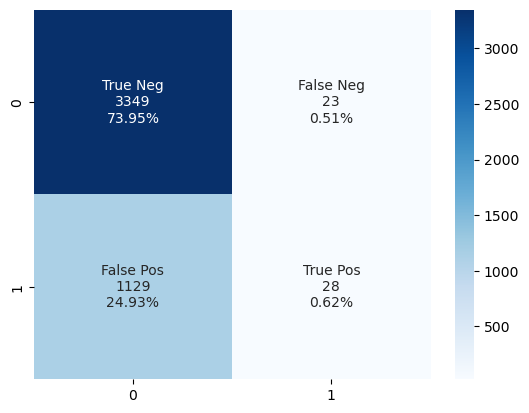

In [343]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [344]:
 #classififcation report
lr_report = classification_report(y_test, y_pred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3372
           1       0.55      0.02      0.05      1157

    accuracy                           0.75      4529
   macro avg       0.65      0.51      0.45      4529
weighted avg       0.70      0.75      0.65      4529



In [345]:
#Logistic regression model accuracy
lr_model.score(X_test,y_test)

0.7456392139545154

In [350]:
#creating a copy of original dataframe to perform one hot encoding of independent variables
housing_data = housing.copy()

In [351]:
housing_data['Sale Month'] = pd.to_datetime(housing_data['Sale Date']).dt.month

In [352]:
housing_data.drop(columns=['Sale Date','Property Address','Legal Reference'],axis=1,inplace = True)

In [353]:
housing_data = pd.get_dummies(housing_data, columns=['Land Use','Property City','Sold As Vacant', 'Multiple Parcels Involved in Sale', 'State', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade'], drop_first=True, dummy_na=False)
housing_data

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Year Built  Bedrooms  Full Bath  Half Bath  \
0            1941       2.0        1.0        

In [354]:
# Split the data into training and testing sets
X1 = housing_data.drop(['Sale Price Compared To Value'], axis=1)
y1 = housing_data['Sale Price Compared To Value']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### Decision Tree

In [355]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

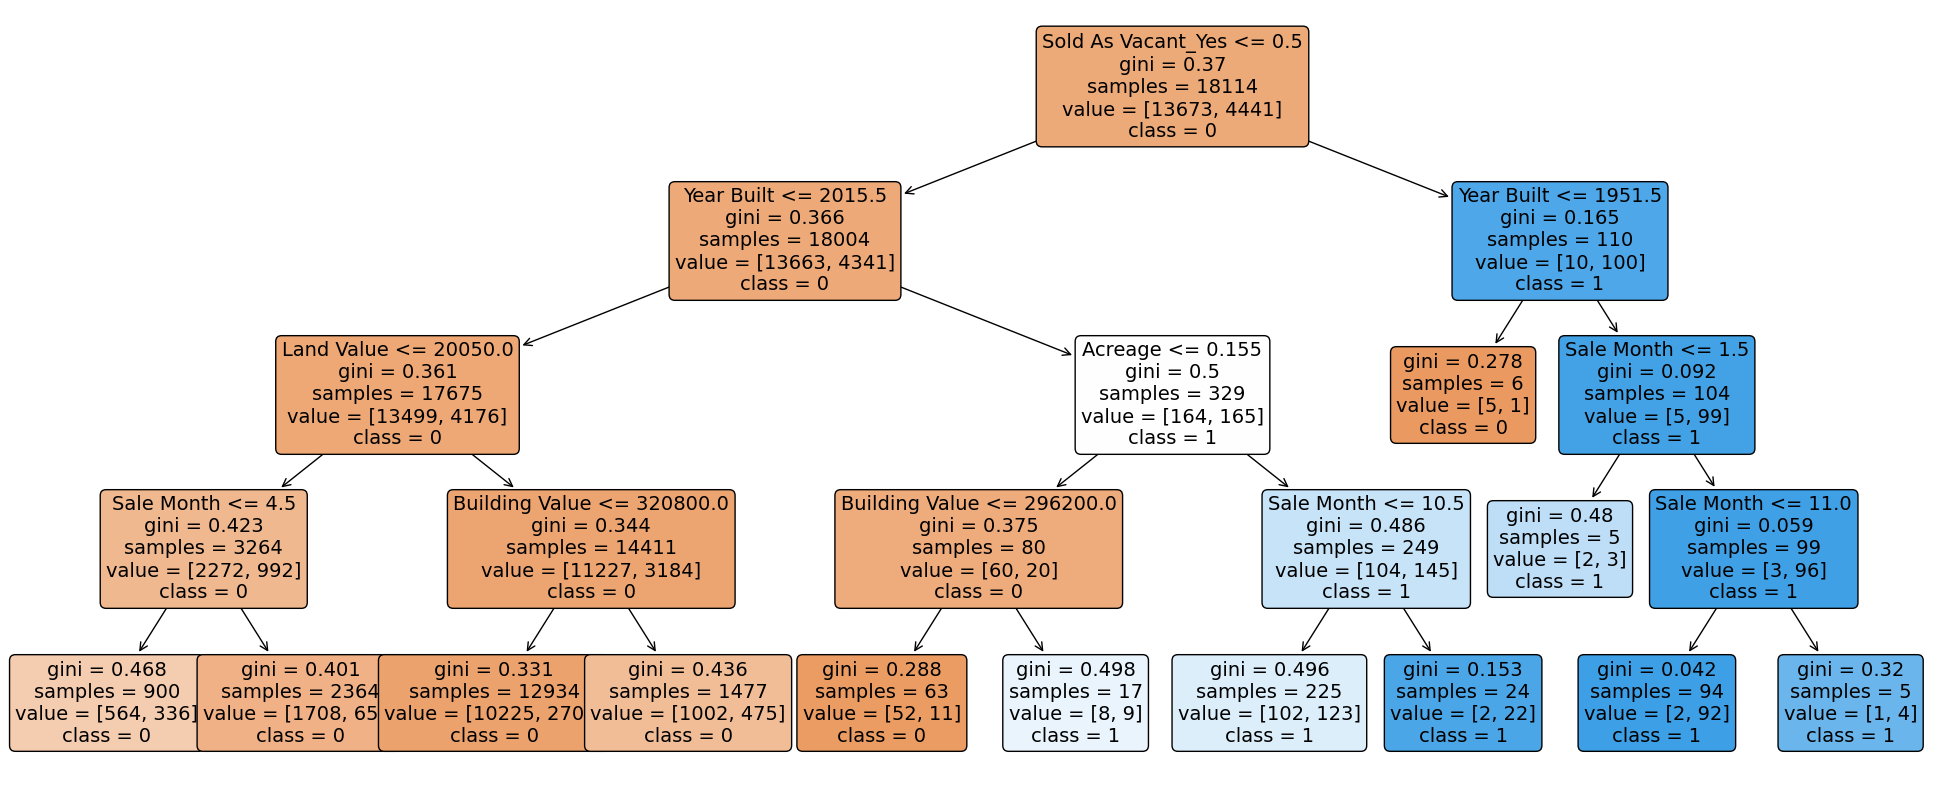

In [356]:
plt.figure(figsize=(25,10))
plot=tree.plot_tree(dt_model,feature_names=X1.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)

In [358]:
#Accuracy
y1_pred = dt_model.predict(X1_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y1_test,y1_pred)

0.7531463899315523

In [359]:
#Confusion Matrix
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[3348   24]
 [1094   63]]
              precision    recall  f1-score   support

        Over       0.75      0.99      0.86      3372
       Under       0.72      0.05      0.10      1157

    accuracy                           0.75      4529
   macro avg       0.74      0.52      0.48      4529
weighted avg       0.75      0.75      0.66      4529



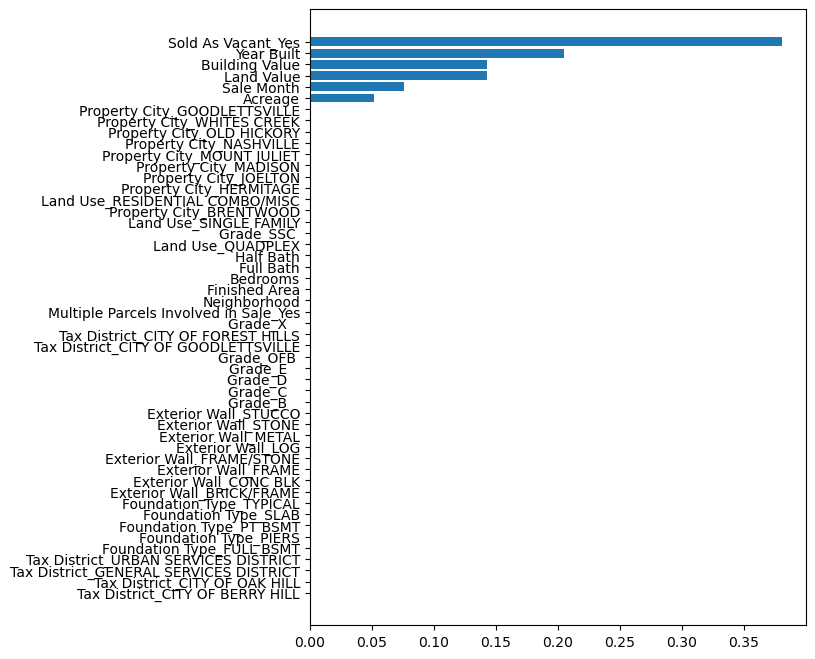

In [361]:
#Feature Importance
importances = dt_model.feature_importances_

indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(6.4, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X1_train.columns)[indices])

### Random Forest

In [362]:
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [363]:
#Accuracy
yrf_predict = rf_model.predict(X1_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y1_test,yrf_predict)

0.7489512033561493

In [364]:
#Confusion Matrix
print(confusion_matrix(y1_test, yrf_predict))
print(classification_report(y1_test, yrf_predict))

[[3368    4]
 [1133   24]]
              precision    recall  f1-score   support

        Over       0.75      1.00      0.86      3372
       Under       0.86      0.02      0.04      1157

    accuracy                           0.75      4529
   macro avg       0.80      0.51      0.45      4529
weighted avg       0.78      0.75      0.65      4529



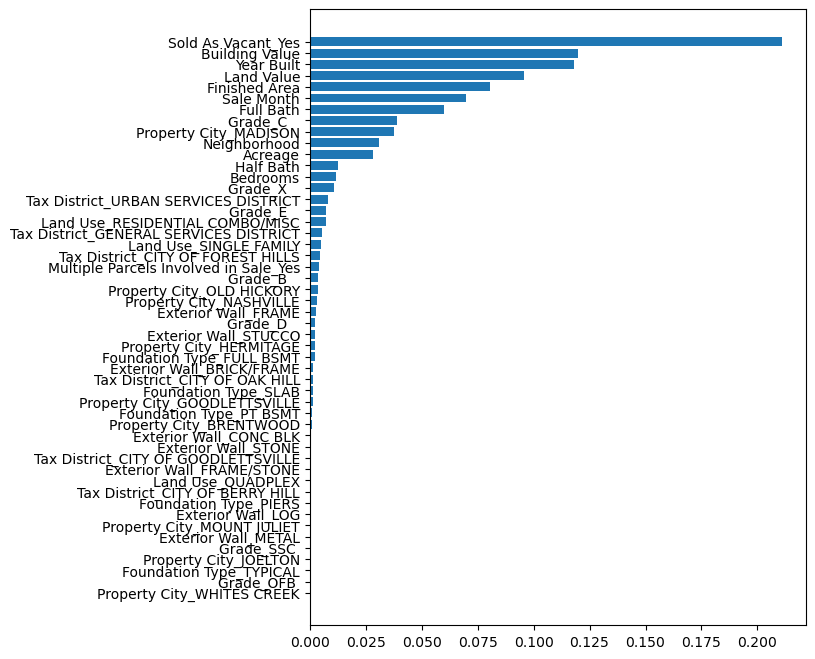

In [365]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(6.4, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X1_train.columns)[indices])

### Gradient Boost Model

In [366]:
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(X1_train,y1_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [367]:
#Accuracy
ygb_predict = gb_model.predict(X1_test)
accuracy_score(y1_test,ygb_predict)

0.7551335835725326

In [368]:
#Confusion Matrix
print(confusion_matrix(y1_test, ygb_predict))
print(classification_report(y1_test, ygb_predict))

[[3326   46]
 [1063   94]]
              precision    recall  f1-score   support

        Over       0.76      0.99      0.86      3372
       Under       0.67      0.08      0.14      1157

    accuracy                           0.76      4529
   macro avg       0.71      0.53      0.50      4529
weighted avg       0.74      0.76      0.68      4529



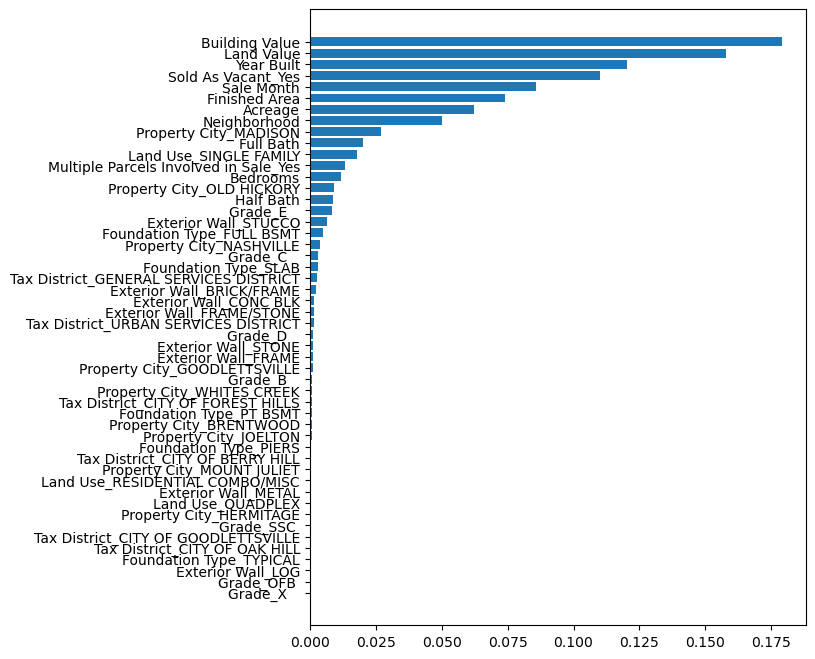

In [369]:
#Feature Importance
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(6.4, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X1_train.columns)[indices])